# Milestone 3

## TFX Pipeline

In [4]:
import tfx
import tensorflow as tf

In [5]:
print("TFX Version:", tfx.__version__)
print("TensorFlow Version:", tf.__version__)

TFX Version: 1.15.0
TensorFlow Version: 2.15.1


In [11]:
from tfx.orchestration.metadata import sqlite_metadata_connection_config
from tfx.orchestration.portable.mlmd import execution_lib
from ml_metadata.metadata_store import metadata_store
import os

In [7]:
metadata_path = "../tfx_metadata/metadata.db"
metadata_config = sqlite_metadata_connection_config(metadata_path)

In [13]:
store = metadata_store.MetadataStore(metadata_config)

### Connect and list artifact types

In [14]:
pipelines = store.get_contexts_by_type("pipeline")
print("✅ Available Pipelines:")
for p in pipelines:
    print("-", p.name)

✅ Available Pipelines:
- multimodal_search_pipeline


In [15]:
for p in pipelines:
    executions = store.get_executions_by_context(p.id)
    print(f"\n📊 Pipeline: {p.name} — {len(executions)} execution(s)")
    for i, e in enumerate(executions):
        print(f"  🔹 Execution {i+1}: {e.last_update_time_since_epoch} | State: {e.last_known_state}")


📊 Pipeline: multimodal_search_pipeline — 15 execution(s)
  🔹 Execution 1: 1742963003844 | State: 2
  🔹 Execution 2: 1742963003749 | State: 5
  🔹 Execution 3: 1742963003521 | State: 5
  🔹 Execution 4: 1742963003351 | State: 5
  🔹 Execution 5: 1742963003103 | State: 5
  🔹 Execution 6: 1742962399922 | State: 2
  🔹 Execution 7: 1742962399583 | State: 3
  🔹 Execution 8: 1742962396804 | State: 3
  🔹 Execution 9: 1742962385139 | State: 3
  🔹 Execution 10: 1742962298829 | State: 3
  🔹 Execution 11: 1742961979164 | State: 4
  🔹 Execution 12: 1742961971544 | State: 3
  🔹 Execution 13: 1742961969532 | State: 3
  🔹 Execution 14: 1742961968838 | State: 3
  🔹 Execution 15: 1742961939532 | State: 3


## TFX components

In [16]:
components = set()
for p in pipelines:
    executions = store.get_executions_by_context(p.id)
    for e in executions:
        for event in store.get_events_by_execution_ids([e.id]):
            artifact = store.get_artifacts_by_id([event.artifact_id])[0]
            components.add(artifact.type_id)

print("\n✅ Components Used (artifact types):")
for cid in components:
    print("-", store.get_artifact_type(cid).name)


✅ Components Used (artifact types):


TypeError: 17 has type int, but expected one of: bytes, unicode

In [18]:
with Metadata(metadata_config) as metadata:
    pipelines = metadata.store.get_contexts()
    print("✅ Registered Pipelines and Runs:")
    for ctx in pipelines:
        print("-", ctx)

✅ Registered Pipelines and Runs:
- id: 1
type_id: 10
name: "multimodal_search_pipeline"
type: "pipeline"
create_time_since_epoch: 1742961908546
last_update_time_since_epoch: 1742961908546

- id: 2
type_id: 11
name: "2025-03-26T04:05:08.259235"
type: "pipeline_run"
create_time_since_epoch: 1742961908683
last_update_time_since_epoch: 1742961908683

- id: 3
type_id: 12
name: "multimodal_search_pipeline.CsvExampleGen"
type: "node"
create_time_since_epoch: 1742961908891
last_update_time_since_epoch: 1742961908891

- id: 4
type_id: 14
name: "5aeebdc1a6b8d70ad5f2604136e8ced09eb189bc0a844b158768661caeb61da9"
type: "execution_cache"
create_time_since_epoch: 1742961909320
last_update_time_since_epoch: 1742961909320

- id: 5
type_id: 12
name: "multimodal_search_pipeline.StatisticsGen"
type: "node"
create_time_since_epoch: 1742961939608
last_update_time_since_epoch: 1742961939608

- id: 6
type_id: 14
name: "319abcd2182b71fc8b7e0a842fcd2dfc63f4ef77ea6560eb564928e9023134ca"
type: "execution_cache"
c

/tmp/ipykernel_3568546/48218112.py:26: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/yassinemaatougui/miniconda3/envs/smartsearch/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


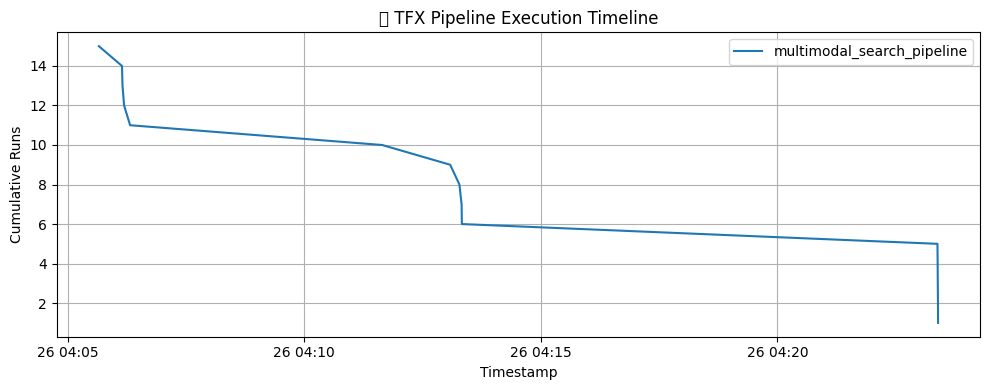

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

records = []
for p in pipelines:
    executions = store.get_executions_by_context(p.id)
    for e in executions:
        ts = datetime.datetime.fromtimestamp(e.last_update_time_since_epoch / 1000)
        records.append({"pipeline": p.name, "timestamp": ts})

if records:
    df = pd.DataFrame(records)
    df["count"] = 1

    plt.figure(figsize=(10, 4))
    for pipeline in df["pipeline"].unique():
        subset = df[df["pipeline"] == pipeline]
        plt.plot(subset["timestamp"], subset["count"].cumsum(), label=pipeline)

    plt.title("📈 TFX Pipeline Execution Timeline")
    plt.xlabel("Timestamp")
    plt.ylabel("Cumulative Runs")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("No executions found to visualize.")